# Centre Manifold plots
----
Here we use a simpler interpolation proceedure, as we are primarily interesested in the plotting of the centre manifold.

In [1]:
%matplotlib qt
import numpy as np
from numpy import cos, sin, cosh, sinh, tanh, array,pi, exp,array,sqrt
from numpy.linalg import norm,solve
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.linalg
import scipy.io
from model import linearisedSystem,model,eigen,Usolve,Lsolve
from StableManifoldImmersion import getInterpolatedImmersionS
h,k = tuple(np.load("ModelParameters.npy"))
D  =lambda v: k*v
ForcingParameters = tuple(np.load("ForcingParameters.npy"))
T,N = tuple(np.load("TimeInterval.npy"))
N = int(N)
forcingtypevector = np.load("forcingtype.npy")
if forcingtypevector[0] == 0:
    forcingtype = "periodic"
elif forcingtypevector[0] == 1:
    forcingtype = "quasi-periodic"
else:
    print("clarify forcingtype")
if   forcingtype == "periodic":
    Amp1,w12 = ForcingParameters
    G = lambda t : Amp1*cos(w1*t)        
elif forcingtype == "quasi-periodic":
    n = len(ForcingParameters)//3
    Amp = np.zeros(n)
    w = np.zeros(n)
    eps = np.zeros(n)
    for i in range(0,n):
        Amp[i] = ForcingParameters[3*i]
        w[i] = ForcingParameters[3*i+1]
        eps[i] = ForcingParameters[3*i+2]
    G = lambda t : Amp.dot(cos(t*w + eps))  


thyperbolic = np.linspace(-T,T,N)
f,Aplus, Aminus, xplus, xminus = model(h,k,D,G)
dt = 2*T/N
Pplus,Pplusinv,Pminus,Pinvminus,lambda2, omega, lambda3, lambda4  =  eigen(h,k)
Xhyperbolicplus= np.load('Xhyperbolicplus.npy')
Xhyperbolicminus= np.load('Xhyperbolicminus.npy')
Deltatminus = int(- N*np.log(10)/(2*T*lambda3))
Deltatplus = int(N*np.log(10)/(2*T*lambda4))
pointsCplus= np.load("pointsCMplus.npy")
valxCplus = np.load("valxCplus.npy")
valyCplus= np.load("valyCplus.npy")
valvxCplus= np.load("valvxCplus.npy")
valvyCplus= np.load("valvyCplus.npy")
pointsCminus = np.load("pointsCMminus.npy")
valxCminus = np.load("valxCminus.npy")
valyCminus= np.load("valyCminus.npy")
valvxCminus= np.load("valvxCminus.npy")
valvyCminus= np.load("valvyCminus.npy")
RCplus = np.load("RCplus.npy")[0]
RCminus = np.load("RCminus.npy")[0]
tindicesCplus = np.load("tindicesCplus.npy")
tindicesCminus = np.load("tindicesCminus.npy")

In [2]:
import scipy.interpolate
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import RBFInterpolator
interpxplus = LinearNDInterpolator(pointsCplus, valxCplus)
interpyplus = LinearNDInterpolator(pointsCplus, valyCplus)
interpvxplus = LinearNDInterpolator(pointsCplus, valvxCplus)
interpvyplus = LinearNDInterpolator(pointsCplus, valvyCplus)
xCMplus = lambda q1,q2,s : interpxplus(array([q1,q2,s]))
yCMplus = lambda q1,q2,s : interpyplus(array([q1,q2,s]))
vxCMplus =lambda q1,q2,s : interpvxplus(array([q1,q2,s]))
vyCMplus =lambda q1,q2,s : interpvyplus(array([q1,q2,s]))

interpxminus = LinearNDInterpolator(pointsCminus, valxCminus)
interpyminus = LinearNDInterpolator(pointsCminus, valyCminus)
interpvxminus = LinearNDInterpolator(pointsCminus, valvxCminus)
interpvyminus = LinearNDInterpolator(pointsCminus, valvyCminus)
xCMminus = lambda q1,q2,s : interpxminus(array([q1,q2,s]))
yCMminus = lambda q1,q2,s : interpyminus(array([q1,q2,s]))
vxCMminus =lambda q1,q2,s : interpvxminus(array([q1,q2,s]))
vyCMminus =lambda q1,q2,s : interpvyminus(array([q1,q2,s]))

In [3]:
q1Cplus = np.linspace(-RCplus,RCplus,100)
q2Cplus = np.linspace(-RCplus,RCplus,100)
q1Cminus = np.linspace(-RCminus,RCminus,100)
q2Cminus = np.linspace(-RCminus,RCminus,100)
tindices = np.arange(Deltatminus,N-Deltatplus,4)


In [5]:
xplus = np.zeros((len(tindices),len(q1Cplus),len(q2Cplus)))
yplus = np.zeros((len(tindices),len(q1Cplus),len(q2Cplus)))
vxplus = np.zeros((len(tindices),len(q1Cplus),len(q2Cplus)))
vyplus = np.zeros((len(tindices),len(q1Cplus),len(q2Cplus)))
for i in range(0,len(tindices)):
    for l in range(0, len(q1Cplus)):
        for j in range(0,len(q2Cplus)):
            xplus[i,l,j] = xCMplus(q1Cplus[l],q2Cplus[j],thyperbolic[ tindices[i]])[0]
            yplus[i,l,j] = yCMplus(q1Cplus[l],q2Cplus[j],thyperbolic[tindices[i]])[0]
            vxplus[i,l,j] = vxCMplus(q1Cplus[l],q2Cplus[j],thyperbolic[ tindices[i]])[0]  
            vyplus[i,l,j] = vyCMplus(q1Cplus[l],q2Cplus[j],thyperbolic[tindices[i]])[0]
            
tC = thyperbolic[tindices]

In [6]:
xminus = np.zeros((len(tindices),len(q1Cminus),len(q2Cminus)))
yminus = np.zeros((len(tindices),len(q1Cminus),len(q2Cminus)))
vxminus = np.zeros((len(tindices),len(q1Cminus),len(q2Cminus)))
vyminus = np.zeros((len(tindices),len(q1Cminus),len(q2Cminus)))
for i in range(0,len(tindices)):
    for l in range(0, len(q1Cminus)):
        for j in range(0,len(q2Cminus)):
            xminus[i,l,j] = xCMminus(q1Cminus[l],q2Cminus[j],thyperbolic[ tindices[i]])[0]
            yminus[i,l,j] = yCMminus(q1Cminus[l],q2Cminus[j],thyperbolic[tindices[i]])[0]
            vxminus[i,l,j] = vxCMminus(q1Cminus[l],q2Cminus[j],thyperbolic[ tindices[i]])[0]  
            vyminus[i,l,j] = vyCMminus(q1Cminus[l],q2Cminus[j],thyperbolic[tindices[i]])[0]
            
tC = thyperbolic[tindices]

## Centre manifold plots
-----
We show this for the positive centre manifold, that is the centre manifold for the positive side

In [7]:
x = xplus
y = yplus
vx = vxplus
vy = vyplus
q1C = q1Cplus
q2C = q2Cplus
valx = valxCplus
valy = valyCplus
valvx = valvxCplus
valvy = valvyCplus


In [8]:

import PIL  
from PIL import Image  

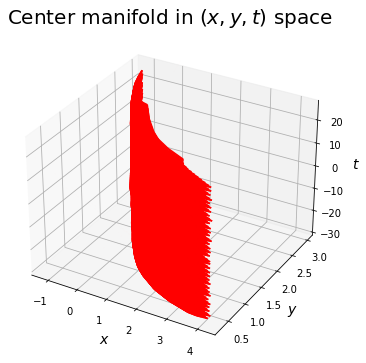

<Figure size 432x288 with 0 Axes>

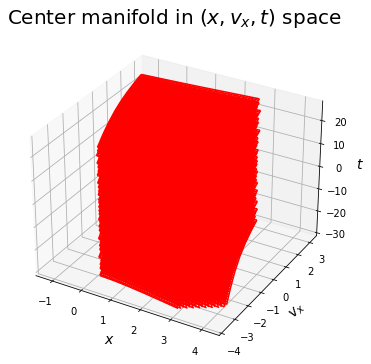

<Figure size 432x288 with 0 Axes>

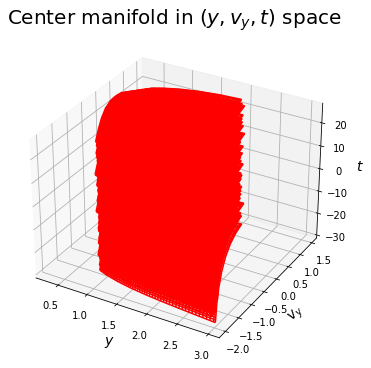

<Figure size 432x288 with 0 Axes>

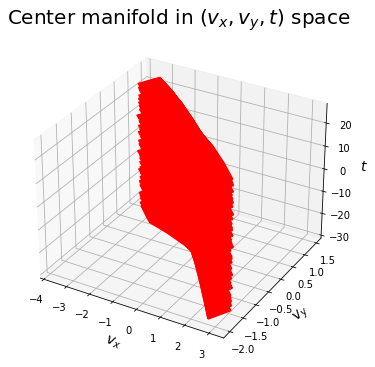

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
for i in range(0,len(tindices)):
    ax.plot_wireframe(x[i,:,:], y[i,:,:], tC[i] + np.zeros((len(q1C),len(q2C))),color = 'red')
title = "Center manifold in $(x,y,t) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.set_zlabel("$t$", fontsize=14)
plt.show()
plt.savefig(title + ".png")    

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
for i in range(0,len(tindices)):
    ax.plot_wireframe(x[i,:,:], vx[i,:,:],  tC[i] + np.zeros((len(q1C),len(q2C))),color = 'red')
title = "Center manifold in $(x,v_x,t) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$v_x$", fontsize=14)
ax.set_zlabel("$t$", fontsize=14)
plt.show()
plt.savefig(title + ".png") 
                      
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
for i in range(0,len(tindices)):
    ax.plot_wireframe(y[i,:,:], vy[i,:,:],  tC[i] + np.zeros((len(q1C),len(q2C))),color = 'red')
title = "Center manifold in $(y,v_y,t) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$y$", fontsize=14)
ax.set_ylabel("$v_y$", fontsize=14)
ax.set_zlabel("$t$", fontsize=14)
plt.show()
plt.savefig(title + ".png") 

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
for i in range(0,len(tindices)):
    ax.plot_wireframe(vx[i,:,:], vy[i,:,:],  tC[i] + np.zeros((len(q1C),len(q2C))),color = 'red')
title = "Center manifold in $(v_x,v_y,t) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$v_x$", fontsize=14)
ax.set_ylabel("$v_y$", fontsize=14)
ax.set_zlabel("$t$", fontsize=14)
plt.show()
plt.savefig(title + ".png") 

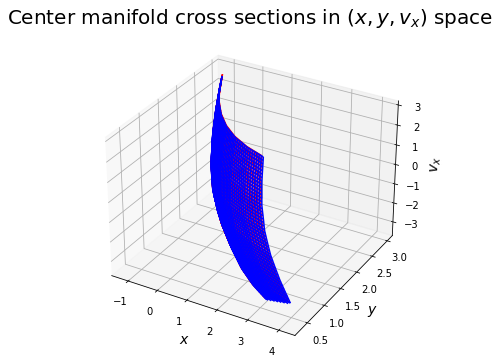

No handles with labels found to put in legend.


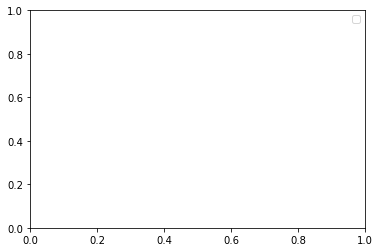

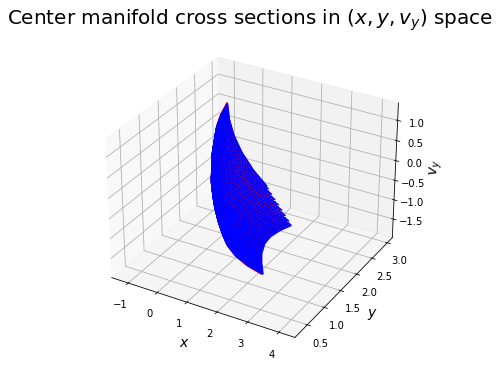

No handles with labels found to put in legend.


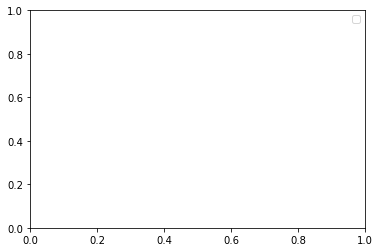

In [10]:
colors = ('red','blue','green','black' )
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
l=0
for i in (0,len(tindices)//2,len(tindices)-1):
    ax.plot_wireframe(x[i,:,:], y[i,:,:], vx[i,:,:],color = colors[l], label = "$t = $"+str(round(thyperbolic[tindices[i]],2)))
    l+=1
    title = "Center manifold cross sections in $(x,y,v_x) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.set_zlabel("$v_x$", fontsize=14)
plt.show()
plt.legend()
plt.savefig(title + ".png") 
    

colors = ('red','blue','green','black' )
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
l=0
for i in (0,len(tindices)//2,len(tindices)-1):
    ax.plot_wireframe(x[i,:,:], y[i,:,:], vy[i,:,:],color = colors[l], label = "$t = $"+str(round(thyperbolic[tindices[i]],2)))
    l+=1
    title = "Center manifold cross sections in $(x,y,v_y) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.set_zlabel("$v_y$", fontsize=14)
plt.show()
plt.legend()
plt.savefig(title + ".png") 

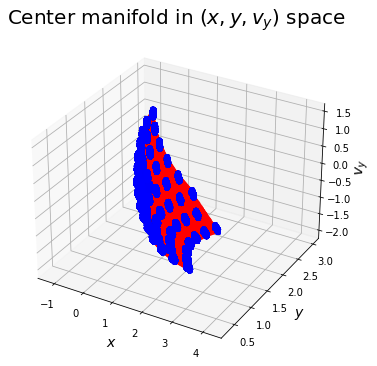

<Figure size 432x288 with 0 Axes>

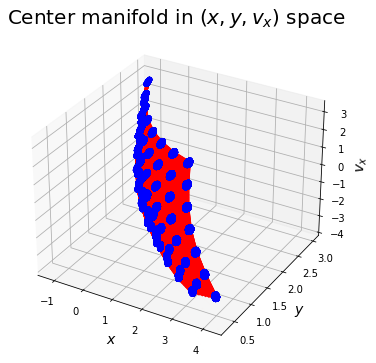

<Figure size 432x288 with 0 Axes>

In [11]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
for i in range(0,len(tindices)):
    ax.plot_wireframe(x[i,:,:], y[i,:,:], vy[i,:,:],color = 'red')
    ax.scatter(valx, valy, valvy ,color = 'b')

title = "Center manifold in $(x,y,v_y) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.set_zlabel("$v_y$", fontsize=14)
plt.show()
plt.savefig(title + ".png") 

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
for i in range(0,len(tindices)):
    ax.plot_wireframe(x[i,:,:], y[i,:,:], vx[i,:,:],color = 'red')
    ax.scatter(valx, valy, valvx ,color = 'b')
    
title = "Center manifold in $(x,y,v_x) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.set_zlabel("$v_x$", fontsize=14)
plt.show()
plt.savefig(title + ".png") 

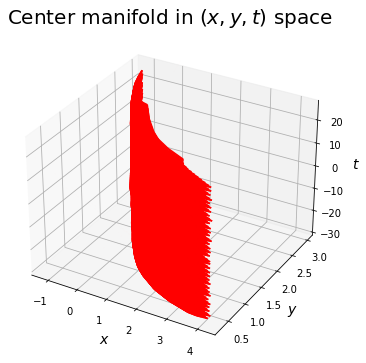

<Figure size 432x288 with 0 Axes>

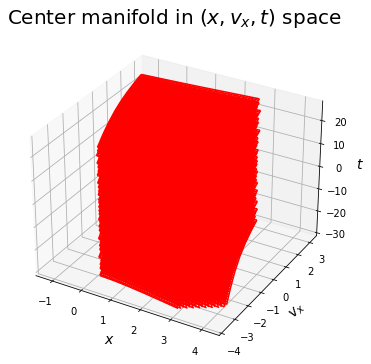

<Figure size 432x288 with 0 Axes>

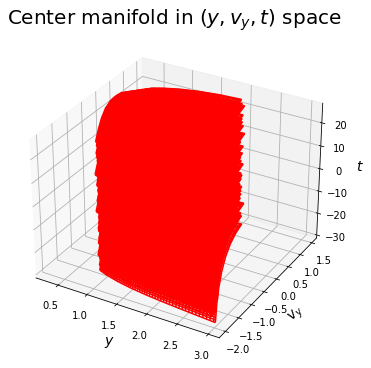

<Figure size 432x288 with 0 Axes>

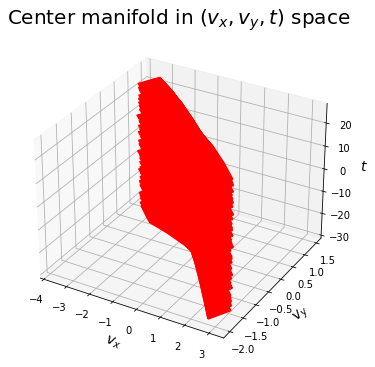

<Figure size 432x288 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
for i in range(0,len(tindices)):
    ax.plot_wireframe(x[i,:,:], y[i,:,:], tC[i] + np.zeros((len(q1C),len(q2C))),color = 'red')
title = "Center manifold in $(x,y,t) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.set_zlabel("$t$", fontsize=14)
plt.show()
plt.savefig(title + ".png")    

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
for i in range(0,len(tindices)):
    ax.plot_wireframe(x[i,:,:], vx[i,:,:],  tC[i] + np.zeros((len(q1C),len(q2C))),color = 'red')
title = "Center manifold in $(x,v_x,t) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$v_x$", fontsize=14)
ax.set_zlabel("$t$", fontsize=14)
plt.show()
plt.savefig(title + ".png") 
                      
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
for i in range(0,len(tindices)):
    ax.plot_wireframe(y[i,:,:], vy[i,:,:],  tC[i] + np.zeros((len(q1C),len(q2C))),color = 'red')
title = "Center manifold in $(y,v_y,t) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$y$", fontsize=14)
ax.set_ylabel("$v_y$", fontsize=14)
ax.set_zlabel("$t$", fontsize=14)
plt.show()
plt.savefig(title + ".png") 

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
for i in range(0,len(tindices)):
    ax.plot_wireframe(vx[i,:,:], vy[i,:,:],  tC[i] + np.zeros((len(q1C),len(q2C))),color = 'red')
title = "Center manifold in $(v_x,v_y,t) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$v_x$", fontsize=14)
ax.set_ylabel("$v_y$", fontsize=14)
ax.set_zlabel("$t$", fontsize=14)
plt.show()
plt.savefig(title + ".png") 

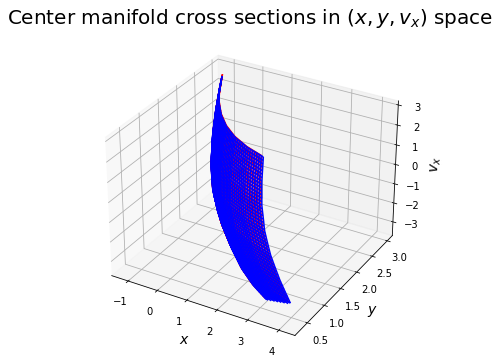

No handles with labels found to put in legend.


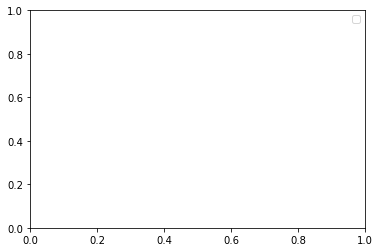

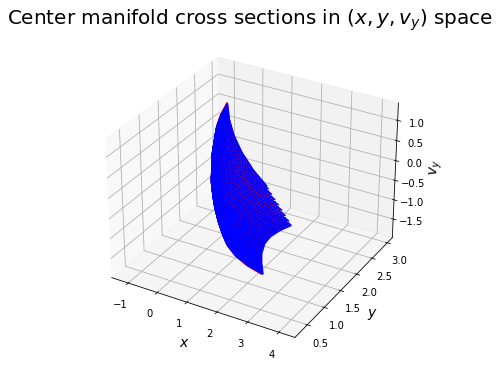

No handles with labels found to put in legend.


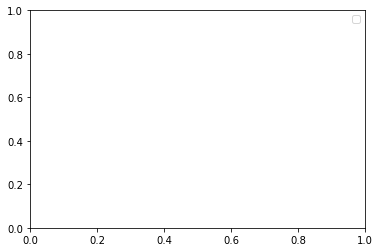

In [13]:
colors = ('red','blue','green','black' )
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
l=0
for i in (0,len(tindices)//2,len(tindices)-1):
    ax.plot_wireframe(x[i,:,:], y[i,:,:], vx[i,:,:],color = colors[l], label = "$t = $"+str(round(thyperbolic[tindices[i]],2)))
    l+=1
    title = "Center manifold cross sections in $(x,y,v_x) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.set_zlabel("$v_x$", fontsize=14)
plt.show()
plt.legend()
plt.savefig(title + ".png") 
    

colors = ('red','blue','green','black' )
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
l=0
for i in (0,len(tindices)//2,len(tindices)-1):
    ax.plot_wireframe(x[i,:,:], y[i,:,:], vy[i,:,:],color = colors[l], label = "$t = $"+str(round(thyperbolic[tindices[i]],2)))
    l+=1
    title = "Center manifold cross sections in $(x,y,v_y) $ space"
plt.title(title, fontsize=20)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.set_zlabel("$v_y$", fontsize=14)
plt.show()
plt.legend()
plt.savefig(title + ".png") 

## Center manifold in eigenbasis coordinates
----

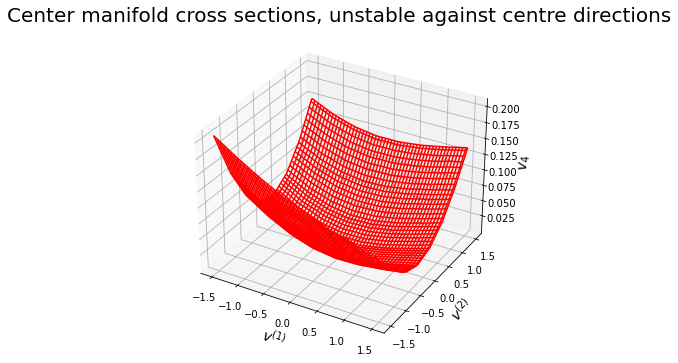

No handles with labels found to put in legend.


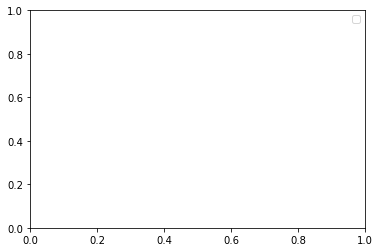

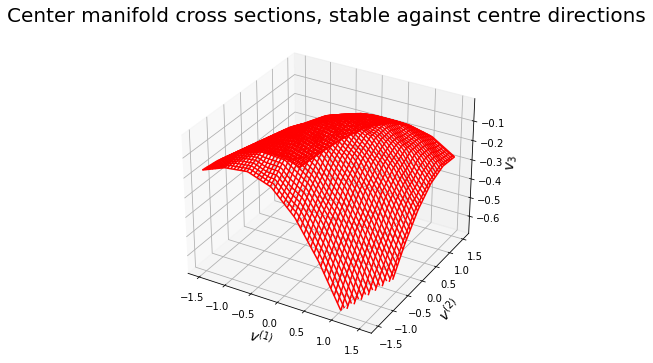

No handles with labels found to put in legend.


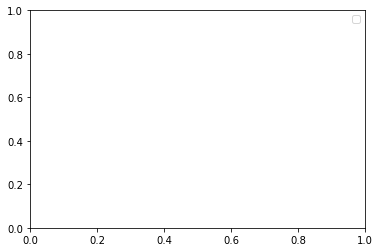

In [14]:
stableCM = np.zeros((len(tindices),len(q1C),len(q2C)))
unstableCM =np.zeros((len(tindices),len(q1C),len(q2C)))
centre1CM = np.zeros((len(tindices),len(q1C),len(q2C)))
centre2CM = np.zeros((len(tindices),len(q1C),len(q2C)))

for i in range(0,len(tindices)):
    for l in range(0, len(q1C)):
        for j in range(0,len(q2C)):
            stableCM[i,l,j] = Pplusinv.dot(    array([x[i,l,j],y[i,l,j],vx[i,l,j],vy[i,l,j]]) - Xhyperbolicplus[tindices[i]]     )[2]  
            unstableCM[i,l,j] = Pplusinv.dot(  array([x[i,l,j],y[i,l,j],vx[i,l,j],vy[i,l,j]]) -  Xhyperbolicplus[tindices[i]])[3] 
            centre1CM[i,l,j] = Pplusinv.dot( array([x[i,l,j],y[i,l,j],vx[i,l,j],vy[i,l,j]]) -  Xhyperbolicplus[tindices[i]])[0] 
            centre2CM[i,l,j] = Pplusinv.dot( array([x[i,l,j],y[i,l,j],vx[i,l,j],vy[i,l,j]]) -  Xhyperbolicplus[tindices[i]])[1] 
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
i=0        
l=0
ax.plot_wireframe(centre1CM[i,:,:], centre2CM[i,:,:], unstableCM[i,:,:],color = colors[l], label = "$t = $"+str(round(thyperbolic[tindices[i]],2)))
l+=1
title = "Center manifold cross sections, unstable against centre directions"
plt.title(title, fontsize=20)
ax.set_xlabel("$v^{(1)}$", fontsize=14)
ax.set_ylabel("$v^{(2)}$", fontsize=14)
ax.set_zlabel("$v_4$", fontsize=14)
plt.show()
plt.legend()          
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')          
i=0        
l=0
ax.plot_wireframe(centre1CM[i,:,:], centre2CM[i,:,:], stableCM[i,:,:],color = colors[l], label = "$t = $"+str(round(thyperbolic[tindices[i]],2)))
title = "Center manifold cross sections, stable against centre directions"
plt.title(title, fontsize=20)
ax.set_xlabel("$v^{(1)}$", fontsize=14)
ax.set_ylabel("$v^{(2)}$", fontsize=14)
ax.set_zlabel("$v_3$", fontsize=14)
plt.show()
plt.legend()   
            
            